# Motor de corrent continu d'excitació independent

L'esquema al rotor és molt semblant al motor d'imants permanents:

![](img/MaqElec/schrotor3.png)

Però ara l'estator té una bobina amb resistència $R_e$ alimentada amb una font externa $U_e$ que genera el camp magnètic

![](img/MaqElec/schestator.png)

## Condicions nominals

No ha canviat res al rotor:

$\Large I_i = \frac{U-\varepsilon}{r} $

Al estator tenim ara un consum:

$\Large I_e = \frac{U_e}{R_e} $


## Inversió de gir

Cal invertir la polaritat de una de las fonts, però no de les dos a la vegada

## Comportament a l'engegada

Donada la similitud amb els motors d'imants permanents, hem de posar un reostat $R_a$ amb sèrie amb el rotor per limitar la intensitat en l'engegada de forma que

$I_a = \alpha \cdot I_n$ 

$1,5 \le \alpha \le 2,5$

$\Large \Gamma_a =  \alpha \cdot \Gamma_n$

Es a dir, si dupliquem la intensitat a l'engegada també dupliquem el parell

## Corbes característiques

Són molt semblants a les del motor d'imants permanents:

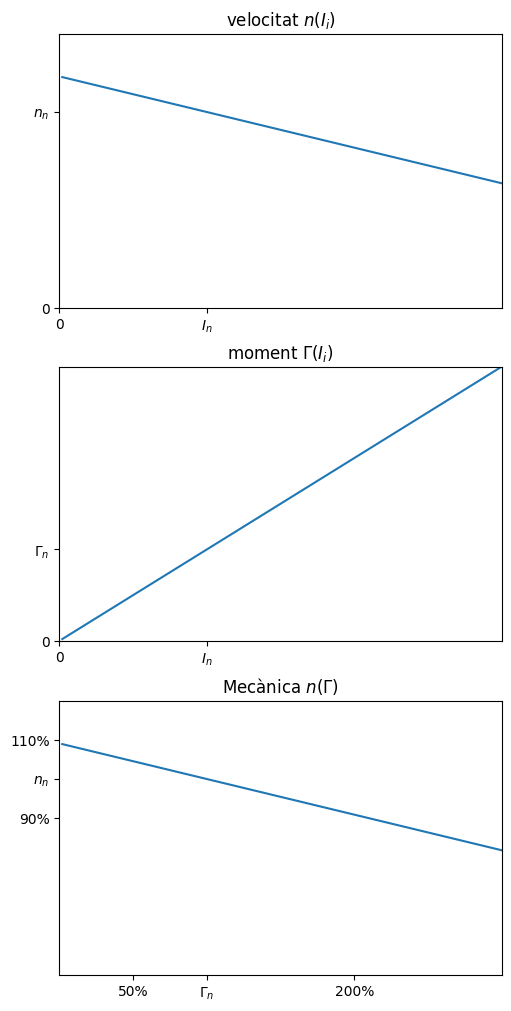

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
Pn=43E3
Un=420
In=121
nn=1133
UEn=200
IEn=6
En=Pn/In
r=(Un-En)/In
wn=nn*2*pi/60
kphin=En/wn
etan=Pn/(In*Un+IEn*UEn)
gn=kphin*In
x = np.linspace(0.02, 3, 300)
I = x*In
g = kphin*I 
e = Un-I*r
w = e/kphin
eta=e*I/(Un*I+UEn*IEn)

fig, axs = plt.subplots(3, 1, figsize=(5, 10), layout='constrained')

axs[0].plot(I/In, w/wn)
axs[0].axis([0, 3, 0, 1.4])
axs[0].set_xticks([0,1], ['0','$I_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('velocitat $n(I_i)$')

axs[1].plot(I/In, g/gn)
axs[1].axis([0, 3, 0, 3])
axs[1].set_xticks([0,1], ['0','$I_n$'])
axs[1].set_yticks([0,1], ['0','$\Gamma_n$'])
axs[1].set_title('moment $\Gamma(I_i)$')

axs[2].plot(g/gn, w/wn)
axs[2].axis([0, 3, 0, 1.4])
axs[2].set_yticks([0.8,1,1.2], ['90%','$n_n$','110%'])
axs[2].set_xticks([0.5,1,2], ['50%','$\Gamma_n$','200%'])
axs[2].set_title('Mecànica $n(\Gamma)$')


plt.show()


## Aplicacions

Com veiem aquest motor té un bon comportment: la variació de la càrrega només modifica lleugerament la velocitat, desenvolupant un parell proporcional al corrent. L'utilització dels elecroimants a l'estator permet fer motors potents i robusts.

Són motors ideals per màquines de velocitat pràcticament constant independentment de la càrrega: torns, trepants, ventiladors, bombes.

Especialment útils en màquines d'elevació on la càrrrega pot ser bruscament suprimida i un motor d'excitació sèrie podria embalar-se.


## Rendiment

Aquest motor té un rendiment nominal:

$$\Large \eta = \frac{P_u}{P_c} = \frac{\varepsilon \cdot I_i}{U \cdot I_i + U_e \cdot I_e}$$

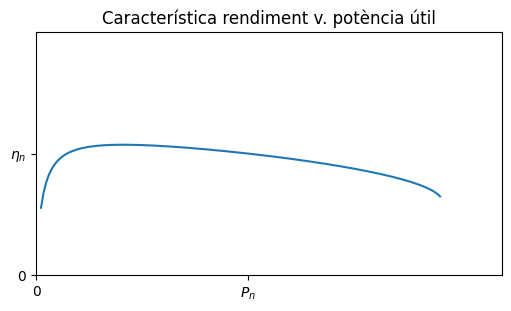

In [2]:
p=I*e

fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ax.plot(p/Pn, eta/etan)
ax.axis([0, 2.2, 0, 2])
ax.set_xticks([0,1], ['0','$P_n$'])
ax.set_yticks([0,1], ['0','$\eta_n$'])
ax.set_title('Característica rendiment v. potència útil')

plt.show()

```{admonition} Pàgina en desenvolupament
Encara estem treballant en aquest document.   
Esperem oferir-vos properament el seu contingut.   
Disculpeu les molèsties.
```

## Variació de la tensió d'excitació externa

Si canviem la tensió d'excitació externa en un factor $\beta$ respecte el seu valor nominal $U_e$:

$U_{exc} = \beta \cdot U_e$

també canviara el consum al estator:

$\Large I_{exc} = \frac{\beta \cdot U_e}{R_e} = \beta \cdot I_e$

Com aquesta intensitat genera el camp magnètic a l'estator, el flux variarà:

$\Phi = \beta \cdot \Phi_n$

Per tant la velocitat i el moment es veuran afectats:

$ \varepsilon = k \cdot \Phi \cdot \omega  = k \cdot \beta \cdot \Phi_n \cdot \omega$

$ \Gamma = k \cdot \Phi \cdot I_i  = k \cdot \beta \cdot \Phi_n \cdot I_i$


Es razonamble pensar que el momento es el nominal?

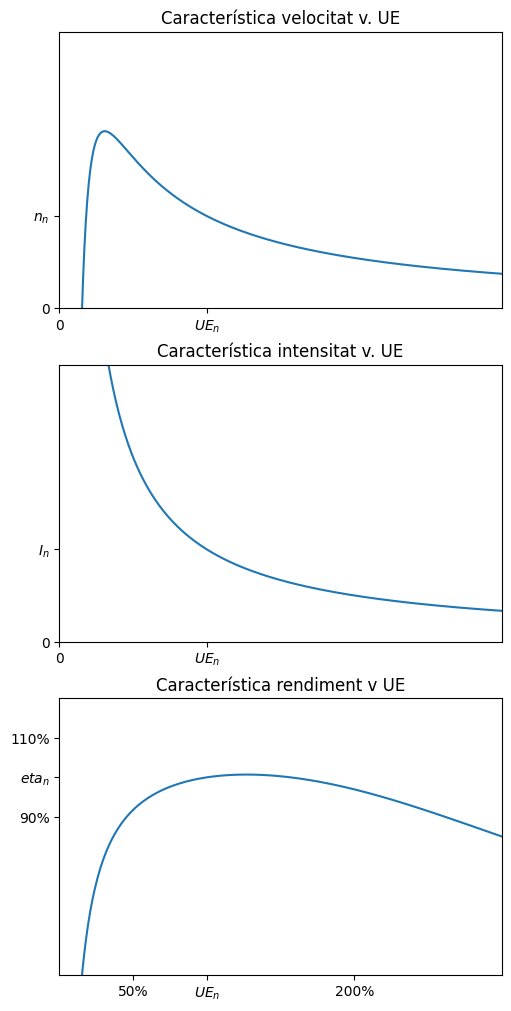

In [3]:
UE = x*UEn
IE = x*IEn
kphi = x*kphin
#sup g = gn

I = gn/kphi
e = Un-I*r
w = e/kphi
eta=e*I/(Un*I+UE*IE)

fig, axs = plt.subplots(3, 1, figsize=(5, 10), layout='constrained')

axs[0].plot(UE/UEn, w/wn)
axs[0].axis([0, 3, 0, 3])
axs[0].set_xticks([0,1], ['0','$UE_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('Característica velocitat v. UE')

axs[1].plot(UE/UEn, I/In)
axs[1].axis([0, 3, 0, 3])
axs[1].set_xticks([0,1], ['0','$UE_n$'])
axs[1].set_yticks([0,1], ['0','$I_n$'])
axs[1].set_title('Característica intensitat v. UE')

axs[2].plot(UE/UEn, eta/etan)
axs[2].axis([0, 3, 0, 1.4])
axs[2].set_yticks([0.8,1,1.2], ['90%','$eta_n$','110%'])
axs[2].set_xticks([0.5,1,2], ['50%','$UE_n$','200%'])
axs[2].set_title('Característica rendiment v UE')


plt.show()


## Exemple

**PAU ELECTROTÈCNIA 2020 S4 P4**

![](img/MaqElec/PAUELEC2020S4P4.png)

In [4]:
PN=4E3
UN=280
IN=17.1
nN=1200
UEXCN=210
REXC=62
wN=nN*2*pi/60

a)

In [5]:
MN=PN/wN
MN

31.830988618379067

b)

In [6]:
EN=PN/IN
Ri=(UN-EN)/IN
Ri

2.6948462774870916

c)

In [7]:
U1=UN/2
M1=MN/2
I1=IN/2
E1=U1-Ri*I1
w1=E1/EN*wN
eta1=(M1*w1)/(U1*I1+UEXCN**2/REXC)*100
eta1

52.40292780228882

d)

In [8]:
UEXC2=UEXCN/2
M2=MN/4
I2=IN/2
n2=2636
w2=n2*2*pi/60
eta2=(M2*w2)/(UN*I2+UEXC2**2/REXC)
eta2

0.8541283847486928